In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Datasets/placement1.csv")

In [3]:
df.sample(4)

,cgpa,placement_exam_marks,placed
12,6.58,16.0,1
83,7.38,20.0,1
716,7.06,19.0,1
501,6.52,31.0,0


In [4]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

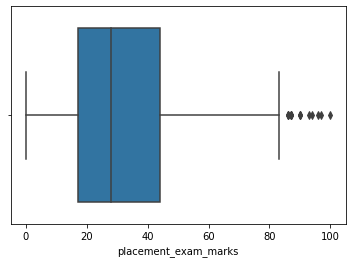

In [5]:
sns.boxplot(df['placement_exam_marks'])

In [6]:
#Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)

In [7]:
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [8]:
iqr= percentile75- percentile25

In [9]:
iqr

27.0

In [10]:
upper_limit = percentile75 + 1.5 *iqr
lower_limit = percentile25 -1.5 *iqr

In [11]:
upper_limit

84.5

In [12]:
lower_limit

-23.5

In [18]:
df[df['placement_exam_marks']> upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [14]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


In [15]:
#trmimming

new_df= df[df['placement_exam_marks']< upper_limit]

In [16]:
new_df.shape

(985, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

<AxesSubplot:xlabel='placement_exam_marks'>

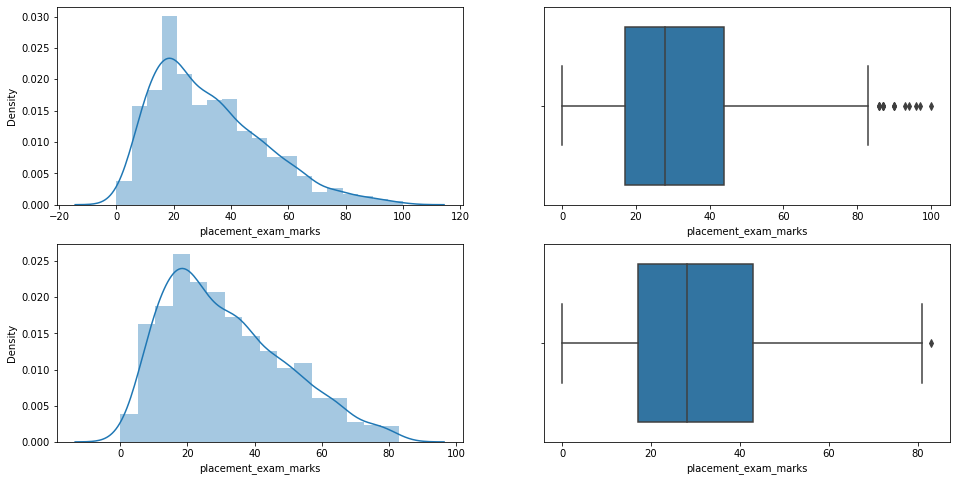

In [23]:
# Comparision

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])


plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

In [24]:
#Capping

In [27]:
new_df_cap = df.copy()

In [28]:
new_df_cap['placement_exam_marks'] = np.where(
     new_df_cap['placement_exam_marks']>upper_limit,
     upper_limit,
     np.where(
         new_df_cap['placement_exam_marks']<lower_limit,
         lower_limit,
         new_df_cap['placement_exam_marks']
      )
)

In [29]:
#np.where( condition, true ,false )

In [31]:
new_df_cap.shape

(1000, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

<AxesSubplot:xlabel='placement_exam_marks'>

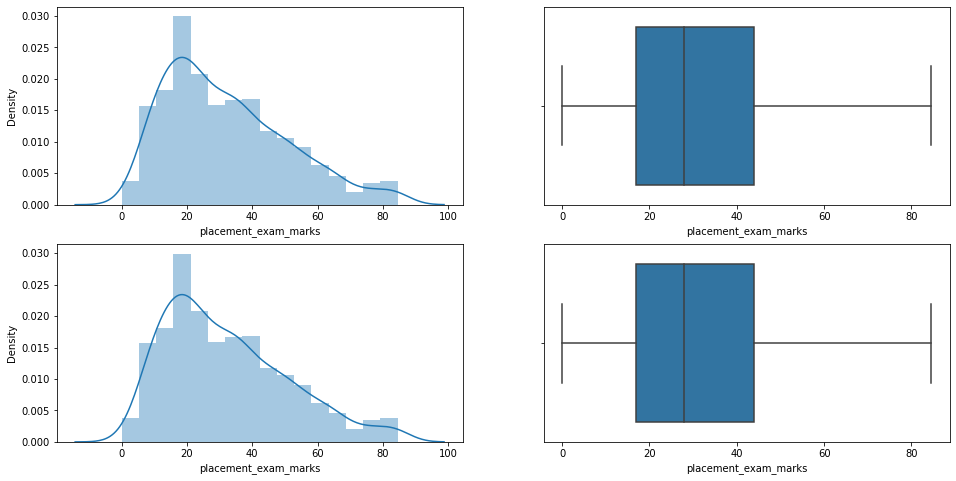

In [32]:
# Comparision

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(new_df_cap['placement_exam_marks'])


plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])